## Data Preprocessing and EDA for Air Quality Index Prediction

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor
import pickle as pkl

%matplotlib inline

In [43]:
path = "E:\jupyter notebooks\AQI-Project-master\Data\Real-Data\Real_Combine.csv"

In [44]:
data = pd.read_csv(path)

In [45]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [46]:
data.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
T         1093 non-null float64
TM        1093 non-null float64
Tm        1093 non-null float64
SLP       1093 non-null float64
H         1093 non-null float64
VV        1093 non-null float64
V         1093 non-null float64
VM        1093 non-null float64
PM 2.5    1092 non-null float64
dtypes: float64(9)
memory usage: 77.0 KB


In [48]:
data.shape

(1093, 9)

In [49]:
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

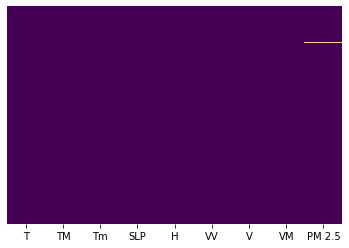

In [50]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [51]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data['PM 2.5'] = imputer.fit_transform(data[['PM 2.5']])

In [52]:
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [53]:
data.corr()['PM 2.5'].sort_values(ascending=False)

PM 2.5    1.000000
SLP       0.622410
H         0.137802
VM       -0.215813
V        -0.268498
TM       -0.567378
VV       -0.573864
T        -0.630705
Tm       -0.673415
Name: PM 2.5, dtype: float64

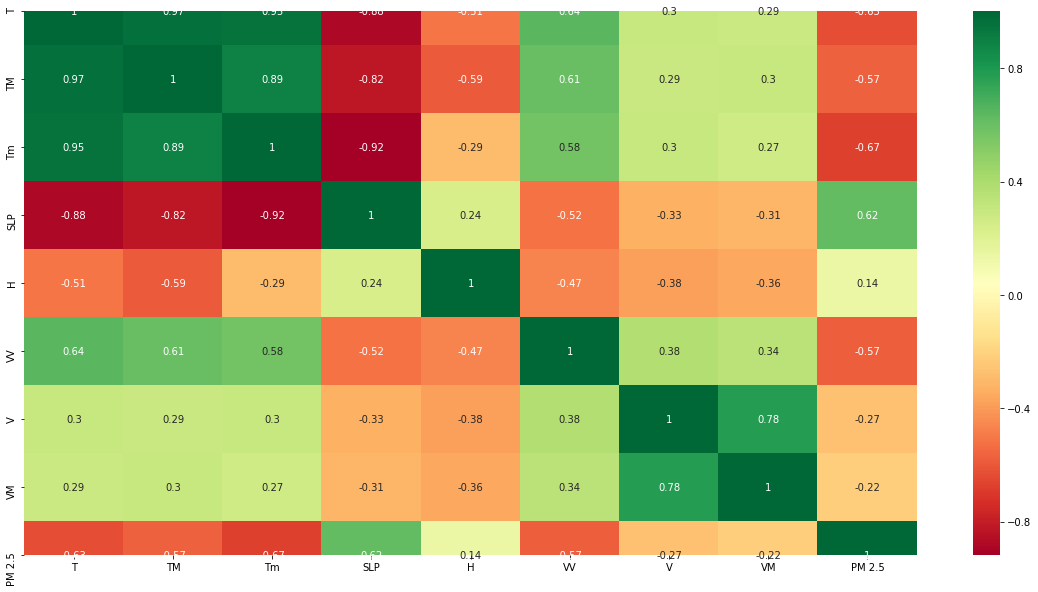

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()

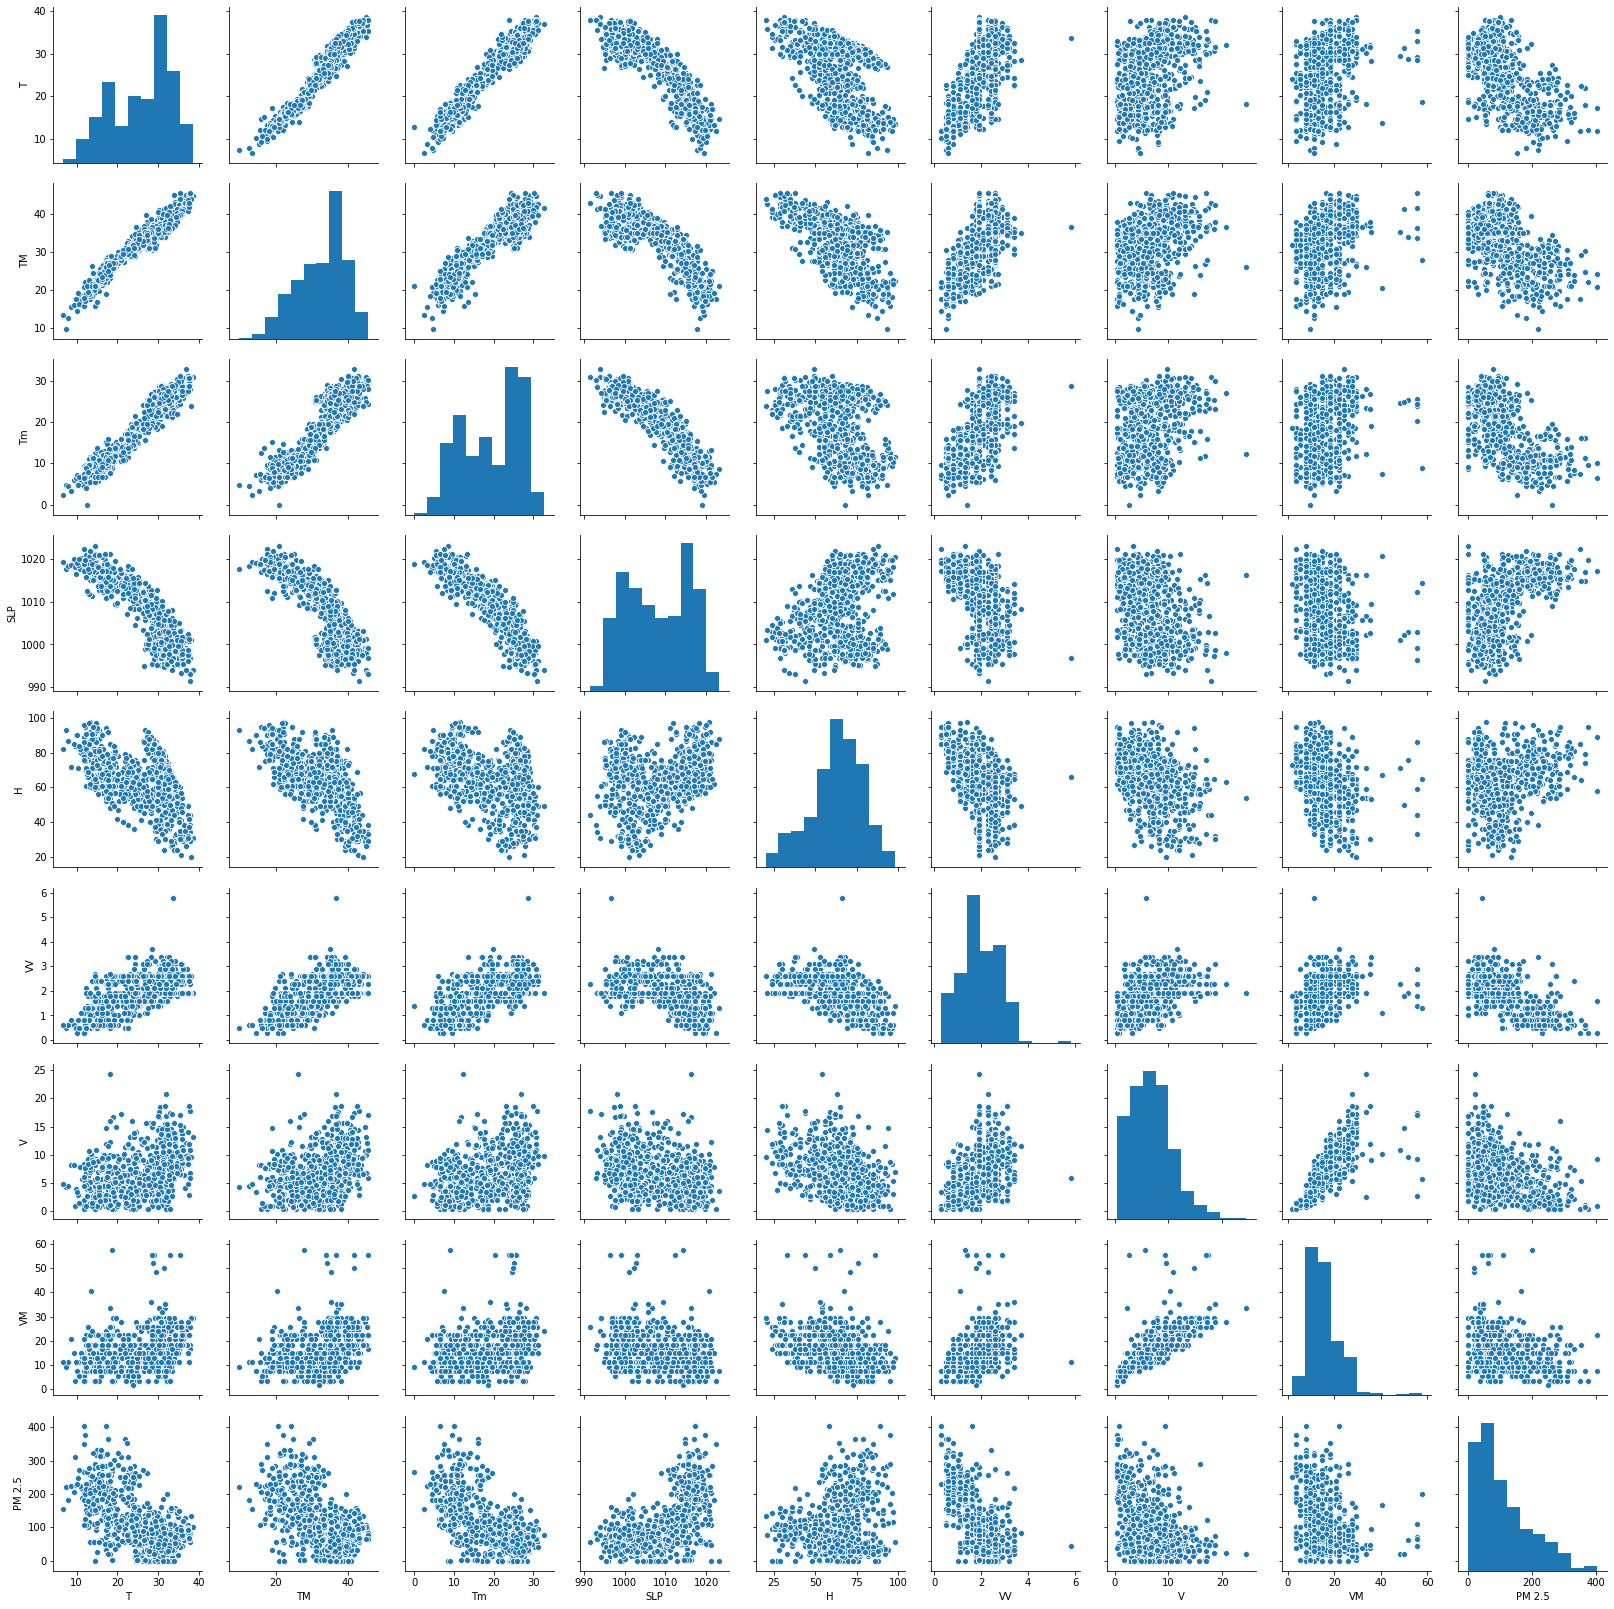

In [55]:
sns.pairplot(data)
plt.show()

In [57]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [58]:
# Feature Importance
feature_selector = ExtraTreesRegressor()
feature_selector.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

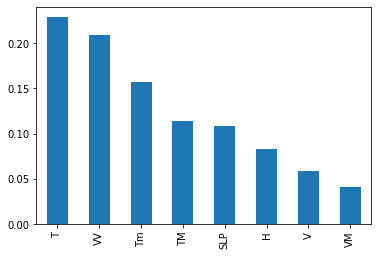

In [61]:
imp_features = pd.Series(feature_selector.feature_importances_, index=X.columns)
imp_features.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [40]:
data.to_pickle("./data/data_air_quality_index.pkl")